# Lab5 Creating a BoW SVM Classifier from MELD and Tweets

Copyright: Vrije Universiteit Amsterdam, Faculty of Humanities, CLTL

To classify your conversation with Eliza, you need to build a SVM emotion classifier using a TFIDF Bag-of-Words representation using all the data from MELD and WASSA Tweets. In this case you can use all the train, test and development data to train the final classifier as you are going to test it on your conversation.

In [1]:
import pandas as pd
from collections import Counter, OrderedDict
import nltk
from nltk.corpus import stopwords
import pickle
import sklearn
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn as sns
import lab5_util as util

### 1. Loading the tweet data set

In [2]:
# HERE COMES THE CODE TO LOAD THE TWEET TRAINING DATA
filepath = './data/wassa/training/all.train.tsv'
dftweets_train = pd.read_csv(filepath, sep='\t')

In [3]:
# HERE COMES THE CODE TO LOAD THE TWEET TEST DATA
filepath = './data/wassa/testing/all.test.tsv'
dftweets_test = pd.read_csv(filepath, sep='\t')

In [4]:
# HERE COMES THE CODE TO LOAD THE TWEET DEVELOPMENT DATA
filepath = './data/wassa/development/all.dev.tsv'
dftweets_dev = pd.read_csv(filepath, sep='\t')

Get the training texts and labels

In [5]:
# HERE COMES THE CODE TO GET THE TEXT FROM TRAIN
tweet_train_instances = dftweets_train['Tweet']
print(f"Number of tweet train instances: {len(tweet_train_instances)}")

# HERE COMES THE CODE TO GET THE LABELS FROM TRAIN
tweet_train_labels = dftweets_train['Label']
print(f"Number of tweet train labels: {len(tweet_train_labels)}")

# HERE COMES THE CODE TO GET THE TEXT FROM TEST
tweet_test_instances = dftweets_test['Tweet']
print(f"Number of tweet test instances: {len(tweet_test_instances)}")

# HERE COMES THE CODE TO GET THE LABEL FROM TEST
tweet_test_labels = dftweets_test['Label']
print(f"Number of tweet test labels: {len(tweet_test_labels)}")

# HERE COMES THE CODE TO GET THE TEXT FROM DEV
tweet_dev_instances = dftweets_dev['Tweet']
print(f"Number of tweet dev instances: {len(tweet_dev_instances)}")

# HERE COMES THE CODE TO GET THE LABELS FROM DEV
tweet_dev_labels = dftweets_dev['Label']
print(f"Number of tweet dev label: {len(tweet_dev_labels)}")

Number of tweet train instances: 3613
Number of tweet train labels: 3613
Number of tweet test instances: 3142
Number of tweet test labels: 3142
Number of tweet dev instances: 694
Number of tweet dev label: 694


## 2. Loading the MELD data set

In [6]:
# HERE COMES THE CODE TO LOAD THE MELD TRAINING DATA
filepath = './data/MELD/train_sent_emo.csv'
dfmeld_train = pd.read_csv(filepath)
util.replace_weird_tokens_in_meld(dfmeld_train)

In [7]:
# HERE COMES THE CODE TO LOAD THE MELD TEST DATA
filepath = './data/MELD/test_sent_emo.csv'
dfmeld_test = pd.read_csv(filepath)
util.replace_weird_tokens_in_meld(dfmeld_test)

In [8]:
# HERE COMES THE CODE TO LOAD THE MELD DEVELOPMENT DATA
filepath = './data/MELD/dev_sent_emo.csv'
dfmeld_dev = pd.read_csv(filepath)
util.replace_weird_tokens_in_meld(dfmeld_dev)

In [9]:
# HERE COMES THE CODE TO GET THE TEXT FROM TRAIN
meld_train_instances = dfmeld_train['Utterance']
print(f"Number of MELD train instances: {len(meld_train_instances)}")

# HERE COMES THE CODE TO GET THE LABELS FROM TRAIN
meld_train_labels = dfmeld_train['Emotion']
print(f"Number of MELD train labels: {len(meld_train_labels)}")

# HERE COMES THE CODE TO GET THE TEXT FROM TEST
meld_test_instances = dfmeld_test['Utterance']
print(f"Number of MELD test instances: {len(meld_test_instances)}")

# HERE COMES THE CODE TO GET THE LABEL FROM TEST
meld_test_labels = dfmeld_test['Emotion']
print(f"Number of MELD test labels: {len(meld_test_labels)}")

# HERE COMES THE CODE TO GET THE TEXT FROM DEV
meld_dev_instances = dfmeld_dev['Utterance']
print(f"Number of MELD dev instances: {len(meld_dev_instances)}")

# HERE COMES THE CODE TO GET THE LABELS FROM DEV
meld_dev_labels = dfmeld_dev['Emotion']
print(f"Number of MELD dev labels: {len(meld_dev_labels)}")


Number of MELD train instances: 9989
Number of MELD train labels: 9989
Number of MELD test instances: 2610
Number of MELD test labels: 2610
Number of MELD dev instances: 1109
Number of MELD dev labels: 1109


## 3. Combining the training data

In [10]:
# HERE COMES THE CODE FOR CREATING A SINGLE TRAINING DATA SET
# Combine the instances and labels for the training data
combined_train_instances = pd.concat([tweet_train_instances, meld_train_instances], ignore_index=True)
combined_train_labels = pd.concat([tweet_train_labels, meld_train_labels], ignore_index=True)

print(f"Number of combined train instances: {len(combined_train_instances)}")
print(f"Number of combined train labels: {len(combined_train_labels)}")


Number of combined train instances: 13602
Number of combined train labels: 13602


Distribution of Emotion Labels in the combined data set:
neutral     4710
joy         2566
anger       1966
sadness     1469
fear        1415
surprise    1205
disgust      271
Name: count, dtype: int64
Total of values 13602


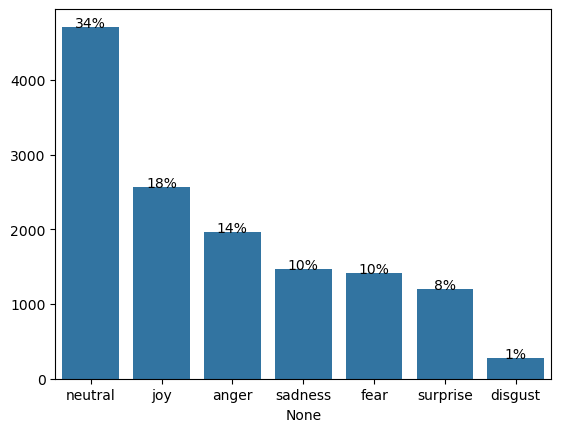

In [11]:
# HERE COMES THE CODE TO CHECK THE DATA AND ANALYSE THE DISTRIBUTION OVER THE EMOTION LABELS
import matplotlib.pyplot as plt
label_distribution = combined_train_labels.value_counts()
print("Distribution of Emotion Labels in the combined data set:")
print(label_distribution)

# Extract labels and values
labels = label_distribution.index
values = label_distribution.values

# Call the utility function to plot the distribution
util.plot_labels_with_counts(labels, values)

In [12]:
# HERE COMES THE CODE TO TRAIN AN SVM CLASSIFIER WITH A BOW TFIDF DATA REPRESENTATION
frequency_threshold = 3
combined_vec = CountVectorizer(min_df=frequency_threshold,
                             tokenizer=nltk.word_tokenize)

training_count_vectors = combined_vec.fit_transform(combined_train_instances)

#Convert raw frequency counts into TF-IDF values
tfidf_transformer = TfidfTransformer()

#For training data we use fit_transform
training_tfidf_vectors = tfidf_transformer.fit_transform(training_count_vectors)
print(training_tfidf_vectors.shape)
print(training_tfidf_vectors.toarray()[0][:50]



/Users/szabo.csenge.99/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(13602, 3616)
[0.21782356 0.38920232 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.2183826  0.         0.         0.
 0.         0.         0.         0.05197148 0.         0.13679981
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [13]:
# HERE COMES THE CODE TO TRAIN AN SVM CLASSIFIER WITH THE TRAINING DATA
svm_linear_clf = svm.LinearSVC(max_iter=2000)
svm_linear_clf.fit(training_tfidf_vectors, combined_train_labels)


/Users/szabo.csenge.99/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(max_iter=2000)

## 4. Saving the final combined classifier to disk

In [14]:
# HERE COMES THE CODE TO SAVE THE CLASSIFIER TO DISK SO THAT YOU CAN USE IT FOR THE FINAL ASSIGNMENT
#save the vectorizer
filename_vectorizer = './models/combined_vectorizer.sav'
pickle.dump(combined_vec, open(filename_vectorizer, 'wb'))

# save the tfidf transformer
filename_tfidftransformer = './models/combined_tfidf_transformer.sav'
pickle.dump(tfidf_transformer, open(filename_tfidftransformer, 'wb'))

# save the classifier to disk
filename_classifier = './models/svm_linear_clf_bow.sav'
pickle.dump(svm_linear_clf, open(filename_classifier, 'wb'))


# End of notebook